# CELLO Mk 3.0, EST. 2023-3-3


## COMPONENT #3:
## UCF Modifier and Formatter

Efficiently modify UCF files and never worry about syntaxical errors.

In [1]:
# Define the input and output paths
in_path = "../../IO/inputs/"
out_path = "../../IO/temp_folder"

In [2]:
import json
import os
import glob
import copy

# Save the current working directory
original_directory = os.getcwd()

# Change to the target directory
os.chdir(in_path)

extension = '.json'
all_files = sorted(list(glob.glob('*' + extension)))
print('listing all JSON files in input path: \n')
for file in all_files:
    print(file)

listing all JSON files in input path: 

Bth1C1G1T1.UCF.json
Bth1C1G1T1.input.json
Bth1C1G1T1.output.json
Eco1C1G1T1.UCF.json
Eco1C1G1T1.input.json
Eco1C1G1T1.output.json
Eco1C2G2T2.UCF.json
Eco1C2G2T2.input.json
Eco1C2G2T2.output.json
Eco2C1G3T1.UCF.json
Eco2C1G3T1.input.json
Eco2C1G3T1.output.json
Eco2C1G5T1.UCF.json
Eco2C1G5T1.input.json
Eco2C1G5T1.output.json
SC1C1G1T1.UCF.json
SC1C1G1T1.input.json
SC1C1G1T1.output.json
and_netlistconstraints.json
custom_input.input.json


In [3]:
UCF_extension = 'UCF.json'

UCF_files = sorted(list(glob.glob('*' + UCF_extension)))
print('ALL UCF files in input path: \n')
for file in UCF_files:
    print(file)
    
# Change back to the local repository
# os.chdir(original_directory)
# on second though, maybe use this in the end

ALL UCF files in input path: 

Bth1C1G1T1.UCF.json
Eco1C1G1T1.UCF.json
Eco1C2G2T2.UCF.json
Eco2C1G3T1.UCF.json
Eco2C1G5T1.UCF.json
SC1C1G1T1.UCF.json


In [4]:
# CHOOSE your UCF file
UCF = "Eco2c1G5T1.UCF.json"

In [5]:
f = open(UCF, 'r')

In [6]:
ucf = json.load(f)
ucf_orig = copy.deepcopy(ucf)

In [7]:
print(type(ucf))
print(len(ucf))

<class 'list'>
681


In [8]:
collections = []
ucf_parts = []


for i in ucf:
    #print(i.keys())
    #print(i['collection'])
    collections.append(i['collection'])
    #if i['collection'] == 'motif_library':
        #print(i['netlist'])
    if i['collection'] == 'parts':
        ucf_parts.append(i['name'])
        #print(i['name'])
    #print()

collection_names = set(collections)

In [9]:
print('Parts in UCF: \n')
print(ucf_parts)
print()
print('Collection Names: \n')
print(collection_names)

Parts in UCF: 

['pLambda', 'Lambda', 'R1', 'R2', 'RiboJ54', 'Ret0', 'pP22', 'P22', 'R3', 'RiboJ71', 'IlvGEDA', 'pTP901', 'TP901', 'R4', 'RiboJ69', 'RpoC', 'pR1t', 'R1t', 'R5', 'BydvJ', 'ECK120029600', 'ElvJ', 'pTuc', 'Tuc2009', 'R6', 'pVP585', 'VP585', 'R16', 'SarJ', 'DT19', 'pPhage186', 'Phage186', 'R7', 'RiboJ10', 'DT83', 'p933W', '933W', 'R8', 'R9', 'PlmJ', 'DT36', 'pL5', 'L5', 'R10', 'RiboJ60', 'L3S2P11', 'pN15', 'N15', 'R11', 'ScmJ', 'DT42', 'pP2hd', 'pP2', 'pWphi', 'P2hd', 'P2', 'Wphi', 'R12', 'R13', 'R14', 'R15', 'R17', 'RiboJ64', 'DT56', 'DT86', 'F_scar', 'E_scar', 'D_scar', 'C_scar', 'B_scar', 'A_scar', 'Y_scar', 'X_scar', 'V_scar', 'U_scar', 'R_scar', 'Q_scar', 'P_scar', 'O_scar', 'G_scar']

Collection Names: 

{'genetic_locations', 'header', 'gates', 'motif_library', 'logic_constraints', 'models', 'measurement_std', 'parts', 'circuit_rules', 'functions', 'structures', 'device_rules'}


In [10]:
def list_collection_prarmeters(ucf: list, cName: str):
    params = []
    for e in ucf:
        if e['collection'] == cName:
            params.append(list(e.keys()))
            
    params_set = set(tuple(x) for x in params)
    params = [list(x) for x in params_set]
    return params

for n in collection_names:
    print(f"PARAM ({n}): ")
    params = list_collection_prarmeters(ucf, n)
    print(max(params)) # prints the longest parameters list

PARAM (genetic_locations): 
['collection', 'locations']
PARAM (header): 
['collection', 'description', 'version', 'date', 'author', 'organism', 'genome', 'media', 'temperature', 'growth']
PARAM (gates): 
['collection', 'name', 'system', 'group', 'regulator', 'gate_type', 'color', 'model', 'structure']
PARAM (motif_library): 
['outputs', 'inputs', 'netlist', 'collection']
PARAM (logic_constraints): 
['collection', 'available_gates']
PARAM (models): 
['collection', 'name', 'functions', 'parameters']
PARAM (measurement_std): 
['collection', 'signal_carrier_units', 'normalization_instructions', 'plasmid_description']
PARAM (parts): 
['collection', 'type', 'name', 'dnasequence']
PARAM (circuit_rules): 
['collection', 'rules']
PARAM (functions): 
['collection', 'name', 'variables', 'table']
PARAM (structures): 
['collection', 'name', 'inputs', 'outputs', 'devices']
PARAM (device_rules): 
['collection', 'rules']


In [11]:
print(json.dumps(ucf[0], indent=2))

{
  "collection": "header",
  "description": "cI homologs: lambda, P22, TP901, r1t, Tuc2009, phage186, 933W, L5, N15, P2hd, P2, VP585, Wphi",
  "version": "Eco2C1G5T1",
  "date": "Tue April 13 16:01:11 EDT 2021",
  "author": [
    "Jai Padmakumar",
    "Alexander J. Triassi",
    "Hamid Doosthosseini",
    "Samuel M.D. Oliveira"
  ],
  "organism": "Escherichia coli MG1655 (Extended #Gates))",
  "genome": "Wildtype (NCBI RefSeq: CP007799) with three landing pads integrated",
  "media": "M9 minimal media composed of M9 media salts (6.78 g/L Na2HPO4, 3 g/L KH2PO4, 1 g/L NH4Cl, 0.5 g/L NaCl, 0.34 g/L thiamine hydrochloride, 0.4% D-glucose, 0.2% Casamino acids, 2 mM MgSO4, and 0.1 mM CaCl2",
  "temperature": "37",
  "growth": "Inoculation: Individual colonies into M9 media, 16 hours overnight in plate shaker.\tDilution: Next day, cells diluted 150-fold into M9 media without antibiotics, growth for 1.5 hours.\tInduction: Cells diluted into M9 media without antibiotics (starting OD600 = 0.003

In [12]:
'''
Testing that all the important parts are in the UCF
'''

ucf_desc = ucf[0]['description'].split(' ')
# print(ucf_desc)
ucf_desc = [d.split(',') for d in ucf_desc]
ucf_desc = [d[0] for d in ucf_desc]
# print(ucf_desc)
marker = -1
check_parts = []
for i in range(len(ucf_desc)):
    if ucf_desc[i] == 'homologs:':
        marker = i + 1
        break
if marker < len(ucf_desc) and marker > -1:
    check_parts = ucf_desc[marker:]
    print('parts from description: \n')
    print(check_parts)
    print(len(check_parts))

parts from description: 

['lambda', 'P22', 'TP901', 'r1t', 'Tuc2009', 'phage186', '933W', 'L5', 'N15', 'P2hd', 'P2', 'VP585', 'Wphi']
13


In [13]:
important_parts = []

for c in ucf:
    #print('whaaat')
    if c['collection'] == 'parts':
        #print('ok')
        if c['name'] in check_parts:
            #print(c['name'])
            important_parts.append(c)
            
#print(json.dumps(important_parts, indent=4))
print(len(important_parts))

10


In [14]:
ucf_functions = [] # *
function_keys = []
for c in ucf:
    if c['collection'] == 'functions':
        function_keys.append(list(c.keys()))
        ucf_functions.append(c)
        
function_keys_set = set(tuple(x) for x in function_keys)
unique_function_keys = [list(x) for x in function_keys_set]
print(json.dumps(unique_function_keys, indent=2))
print(collections.count('functions'))
print(len(ucf_functions))

def get_values_by_name(listofdicts: list, keys: list):
    vals = []
    for d in listofdicts:
        val = []
        for k in keys:
            if k in d.keys():
                val.append(d[k])
                #print(d[k])
            else:
                print('error')
        if val:
            vals.append(val)
    return vals
                
#get_values_by_name(ucf_functions, ['name'])
function_names = get_values_by_name(ucf_functions, ['name'])
print(function_names)
#print(json.dumps(ucf_functions[:10], indent=4))

[
  [
    "collection",
    "name",
    "variables",
    "table"
  ],
  [
    "collection",
    "name",
    "equation",
    "variables"
  ],
  [
    "collection",
    "name",
    "equation",
    "variables",
    "parameters"
  ]
]
36
36
[['Hill_response'], ['linear_input_composition'], ['R1_Lambda_toxicity'], ['R2_Lambda_toxicity'], ['R3_P22_toxicity'], ['R4_TP901_toxicity'], ['R5_R1t_toxicity'], ['R6_Tuc2009_toxicity'], ['R7_Phage186_toxicity'], ['R8_933W_toxicity'], ['R9_933W_toxicity'], ['R10_L5_toxicity'], ['R11_N15_toxicity'], ['R12_P2hd_toxicity'], ['R13_P2_toxicity'], ['R14_P2_toxicity'], ['R15_P2_toxicity'], ['R16_VP585_toxicity'], ['R17_Wphi_toxicity'], ['R1_Lambda_cytometry'], ['R2_Lambda_cytometry'], ['R3_P22_cytometry'], ['R4_TP901_cytometry'], ['R5_R1t_cytometry'], ['R6_Tuc2009_cytometry'], ['R7_Phage186_cytometry'], ['R8_933W_cytometry'], ['R9_933W_cytometry'], ['R10_L5_cytometry'], ['R11_N15_cytometry'], ['R12_P2hd_cytometry'], ['R13_P2_cytometry'], ['R14_P2_cytometry'],

In [15]:
toxicity_graphs = {}

for f in ucf_functions:
    print(f['name'])
    print(f.keys())
    if 'table' in f.keys():
        if type(f['table']) == dict:
            print('table keys: ' + str(f['table'].keys()))
            toxicity_graphs[f['name']] = f['table']
        else:
            # print(f['table'])
            print('long table')
    print()
    
# Conclusion: only toxicity tables have direct X & Y mapping

Hill_response
dict_keys(['collection', 'name', 'equation', 'variables', 'parameters'])

linear_input_composition
dict_keys(['collection', 'name', 'equation', 'variables'])

R1_Lambda_toxicity
dict_keys(['collection', 'name', 'variables', 'table'])
table keys: dict_keys(['x', 'output'])

R2_Lambda_toxicity
dict_keys(['collection', 'name', 'variables', 'table'])
table keys: dict_keys(['x', 'output'])

R3_P22_toxicity
dict_keys(['collection', 'name', 'variables', 'table'])
table keys: dict_keys(['x', 'output'])

R4_TP901_toxicity
dict_keys(['collection', 'name', 'variables', 'table'])
table keys: dict_keys(['x', 'output'])

R5_R1t_toxicity
dict_keys(['collection', 'name', 'variables', 'table'])
table keys: dict_keys(['x', 'output'])

R6_Tuc2009_toxicity
dict_keys(['collection', 'name', 'variables', 'table'])
table keys: dict_keys(['x', 'output'])

R7_Phage186_toxicity
dict_keys(['collection', 'name', 'variables', 'table'])
table keys: dict_keys(['x', 'output'])

R8_933W_toxicity
dict_keys

('R17_Wphi_toxicity', {'x': [0.013914542, 0.030185553, 0.058391454, 0.093907232, 0.14300548, 0.202310877, 0.353791451, 0.625141869, 1.184715283, 1.801997992, 3.241444823, 4.620927241], 'output': [1.0, 0.957358805, 0.892530273, 0.928368747, 0.946287984, 0.893397012, 0.901493208, 0.916871191, 0.902786683, 0.932636847, 0.956544395, 0.941218741]})


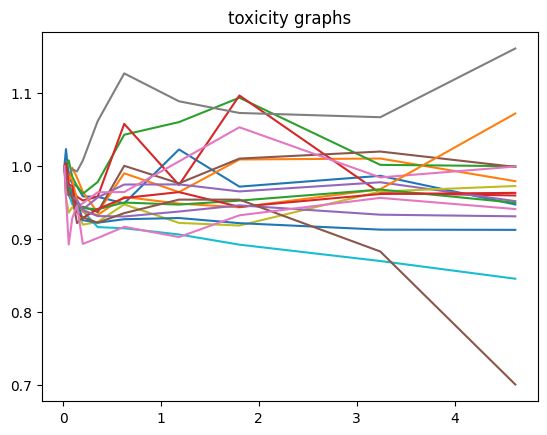

In [16]:
import matplotlib.pyplot as plt

# print(toxicity_graphs)

print(list(toxicity_graphs.items())[-1])

x = []
y = []

for g in toxicity_graphs.items():
    (fname, ftable) = g
    x = ftable['x']
    y = ftable['output']

    # plot the data
    plt.plot(x, y)
    
plt.title('toxicity graphs')

# show the plot
plt.show()
